Saving image1.jpeg to image1.jpeg
Image loaded: image1.jpeg


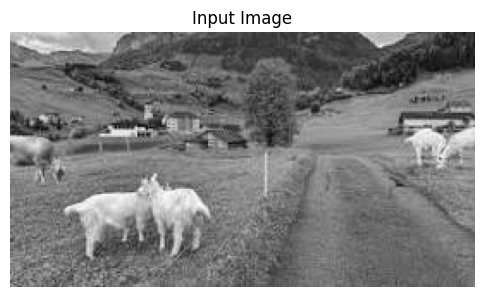

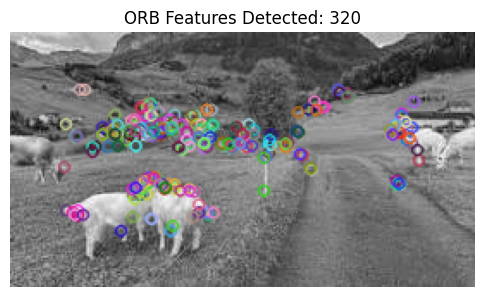

ORB Descriptor Shape: (320, 32)


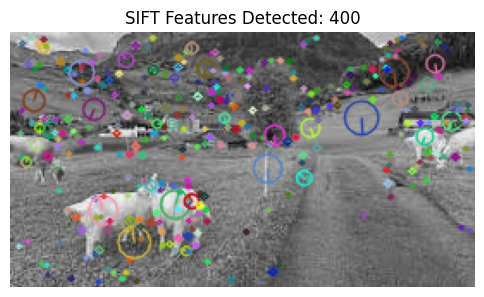

SIFT Descriptor Shape: (400, 128)
❌ SURF not supported (Patent restriction in OpenCV)
===== FEATURE EXTRACTION SUMMARY =====
ORB  Features : 320
SIFT Features : 400


In [1]:
# Feature Extraction and Feature Detection
# SIFT = Scale-Invariant Feature Transform
# ORB  = Oriented FAST and Rotated BRIEF
# SURF = Speeded-Up Robust Features

import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print("Image loaded:", image_path)
# Read image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display image
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Input Image")
plt.axis("off")
plt.show()

# --------------------- ORB ---------------------
# Create ORB detector
orb = cv2.ORB_create(nfeatures=500)

# Detect and compute
kp_orb, des_orb = orb.detectAndCompute(gray, None)

# Draw keypoints
orb_img = cv2.drawKeypoints(
    gray, kp_orb, None,
    flags=cv2.DrawMatchesFlags_DEFAULT
)

# Display ORB result
plt.figure(figsize=(6,6))
plt.imshow(orb_img, cmap='gray')
plt.title(f"ORB Features Detected: {len(kp_orb)}")
plt.axis("off")
plt.show()

print("ORB Descriptor Shape:", des_orb.shape)


# --------------------- SIFT ---------------------
# Create SIFT detector
sift = cv2.SIFT_create()

# Detect and compute
kp_sift, des_sift = sift.detectAndCompute(gray, None)

# Draw keypoints
sift_img = cv2.drawKeypoints(
    gray, kp_sift, None,
    flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

# Display SIFT result
plt.figure(figsize=(6,6))
plt.imshow(sift_img, cmap='gray')
plt.title(f"SIFT Features Detected: {len(kp_sift)}")
plt.axis("off")
plt.show()

print("SIFT Descriptor Shape:", des_sift.shape)


# --------------------- SURF ---------------------
# SURF is patented and usually unavailable in OpenCV (especially in Colab)
try:
    surf = cv2.xfeatures2d.SURF_create(400)
    kp_surf, des_surf = surf.detectAndCompute(gray, None)

    surf_img = cv2.drawKeypoints(
        gray, kp_surf, None,
        flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
    )

    plt.figure(figsize=(6,6))
    plt.imshow(surf_img, cmap='gray')
    plt.title(f"SURF Features Detected: {len(kp_surf)}")
    plt.axis("off")
    plt.show()

    print("SURF Descriptor Shape:", des_surf.shape)

except:
    print("❌ SURF not supported (Patent restriction in OpenCV)")


# --------------------- SUMMARY ---------------------
print("===== FEATURE EXTRACTION SUMMARY =====")
print("ORB  Features :", len(kp_orb))
print("SIFT Features :", len(kp_sift))